# Natural Language Processing - Text Summarization example

###### Links: [News Summary Dataset (Kaggle)](https://www.kaggle.com/pariza/bbc-news-summary)  |  [Article ()]()

### 0 - Setup

###### Import pckgs

In [1]:
import warnings
warnings.filterwarnings("ignore")
from nlp_utils import *

###### Import data

In [21]:
# Read files txt
import os

folder = "data_summary/full_articles/"
full_articles = []
for file in os.listdir(folder):
    try:
        txt = open(folder+file, "r")
        full_articles.append(' '.join([i.strip() for i in txt.readlines()]))
    except Exception as e:
        print("error file:", file, "-->", e)
    
print("len:", len(full_articles))

error file: .DS_Store --> 'utf-8' codec can't decode byte 0xb0 in position 10: invalid start byte
len: 2214


In [13]:
folder = "data_summary/summaries/"
summaries = []
for file in os.listdir(folder):
    try:
        txt = open(folder+file, "r")
        summaries.append(' '.join([i.strip() for i in txt.readlines()]))
    except Exception as e:
        print("error file:", file, "-->", e)
        
print("len:", len(summaries))

error file: .DS_Store --> 'utf-8' codec can't decode byte 0x80 in position 3131: invalid start byte
len: 2214


In [14]:
# Create dataframe
dtf = pd.DataFrame({"text":full_articles, "y":summaries})
dtf.head()

,text,y
0,Wilkinson fit to face Edinburgh England capta...,England captain Jonny Wilkinson will make his ...
1,More reforms ahead says Milburn Labour will c...,Labour will continue to pursue controversial r...
2,Ban on hunting comes into force Fox hunting w...,"We will keep these hounds going, we will keep ..."
3,Davenport hits out at Wimbledon World number ...,Reacting to a disputed comment by All England ...
4,Apple iPod family expands market Apple has ex...,The IFPI industry body said that the popularit...


In [243]:
#import datasets
#dataset = datasets.load_dataset("cnn_dailymail", '3.0.0')

#lst_dics = [dic for dic in dataset["train"]]
#dtf = pd.DataFrame(lst_dics).rename(columns={"article":"text", "highlights":"y"})[["text","y"]].head(20000)
#dtf.head()

In [2]:
dtf = pd.read_csv("data_summary.csv")
dtf.head()

,text,y
0,It's official: U.S. President Barack Obama wan...,Syrian official: Obama climbed to the top of t...
1,(CNN) -- Usain Bolt rounded off the world cham...,Usain Bolt wins third gold of world championsh...
2,"Kansas City, Missouri (CNN) -- The General Ser...",The employee in agency's Kansas City office is...
3,Los Angeles (CNN) -- A medical doctor in Vanco...,NEW: A Canadian doctor says she was part of a ...
4,(CNN) -- Police arrested another teen Thursday...,Another arrest made in gang rape outside Calif...


In [3]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20000 non-null  object
 1   y       20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [4]:
# check
i = 5
print("--- Full text ---")
print(dtf["text"][i])
print(" ")
print("--- Summary ---")
print(dtf["y"][i])

--- Full text ---
(CNN) -- Thousands on Saturday fled the area in southwestern Ivory Coast where attacks left seven U.N. peacekeepers and eight civilians dead, according to a U.N. official. One attack occurred late Thursday and into Friday near Para Village, not far from the west-central African nation's border with Liberia, according to the United Nations. Humanitarian organizations reported Saturday they were expecting about 4,000 people in Tai, said Remi Dourlot, a spokesman for the U.N. Office for the Coordination of Humanitarian Affairs. Several hundred had arrived by midday Saturday in the town, which is on the edge of Tai National Park. Another 35 families crossed the Ivory Coast's southwest border into U.N. refugee camps in Liberia, and humanitarian groups said hundreds of others had been pushed south by the violence, according to Dourlot. The movement comes after blue-helmeted peacekeepers -- who were in the area because of threats against civilians -- came under attack, the U

### 1 - Text Analysis

- Text cleaning
- Word frequency
- Length analysis

###### Text cleaning

In [5]:
lst_stopwords = create_stopwords()
lst_stopwords = lst_stopwords + ["cnn","says","said","new"]

In [6]:
dtf = add_preprocessed_text(dtf, column="text", punkt=True, lower=True, slang=True, lst_stopwords=lst_stopwords)
dtf = add_preprocessed_text(dtf, column="y", punkt=True, lower=True, slang=True, lst_stopwords=lst_stopwords)
dtf.head()

,text,y,text_clean,y_clean
0,It's official: U.S. President Barack Obama wan...,Syrian official: Obama climbed to the top of t...,official president barack obama wants lawmaker...,syrian official obama climbed top tree know ge...
1,(CNN) -- Usain Bolt rounded off the world cham...,Usain Bolt wins third gold of world championsh...,usain bolt rounded world championships sunday ...,usain bolt wins third gold world championship ...
2,"Kansas City, Missouri (CNN) -- The General Ser...",The employee in agency's Kansas City office is...,kansas city missouri general services administ...,employee agencys kansas city office among hund...
3,Los Angeles (CNN) -- A medical doctor in Vanco...,NEW: A Canadian doctor says she was part of a ...,los angeles medical doctor vancouver british c...,canadian doctor part team examining harry burk...
4,(CNN) -- Police arrested another teen Thursday...,Another arrest made in gang rape outside Calif...,police arrested another teen thursday sixth su...,another arrest made gang rape outside californ...


In [7]:
# check
print("--- Full text ---")
print(dtf["text_clean"][i])
print(" ")
print("--- Summary ---")
print(dtf["y_clean"][i])

--- Full text ---
thousands saturday fled area southwestern ivory coast attacks left seven n peacekeepers eight civilians dead according n official one attack occurred late thursday friday near para village far westcentral african nations border liberia according united nations humanitarian organizations reported saturday expecting 4000 people tai remi dourlot spokesman n office coordination humanitarian affairs several hundred arrived midday saturday town edge tai national park another 35 families crossed ivory coasts southwest border n refugee camps liberia humanitarian groups hundreds others pushed south violence according dourlot movement comes bluehelmeted peacekeepers area threats civilians came attack united nations statement besides n peacekeepers humanitarian groups reported eight civilians died violence dourlot n secretarygeneral ban kimoon friday called government ivory coast utmost identify perpetrators hold accountable added understood peacekeepers remained danger even ton

###### Word frequency

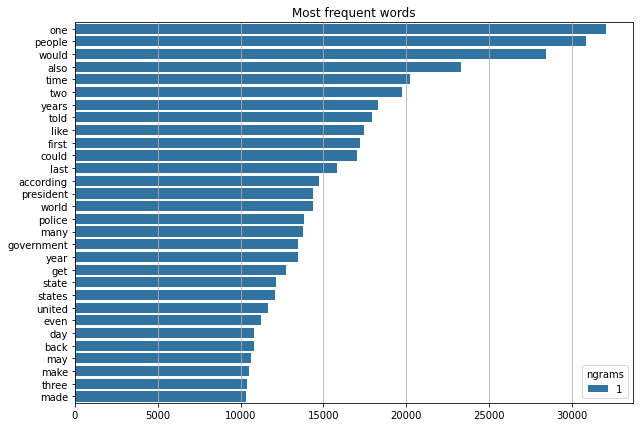

In [8]:
# Find most common words in text
dtf_freq = word_freq(corpus=dtf["text_clean"], ngrams=[1], top=30, figsize=(10,7))

In [9]:
thres = 5
X_top_words = len(dtf_freq[dtf_freq["freq"]>thres])
X_top_words

48670

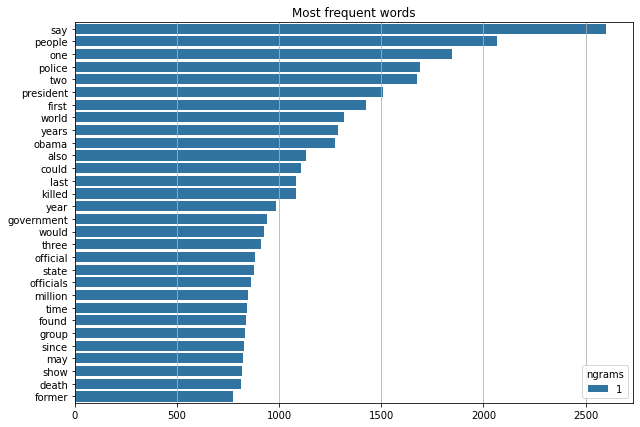

In [10]:
# Find most common words in summaries
dtf_freq = word_freq(corpus=dtf["y_clean"], ngrams=[1], top=30, figsize=(10,7))

In [11]:
thres = 5
y_top_words = len(dtf_freq[dtf_freq["freq"]>thres])
y_top_words

11576

###### Length analysis

In [12]:
# Texts
X = add_text_length(dtf, "text_clean")

                            min         mean          max
char_count           108.000000  2313.625700  10038.00000
word_count            19.000000   364.558350   1308.00000
sentence_count         1.000000     1.000000      1.00000
avg_word_length        4.063492     6.341562     35.34507
avg_sentence_lenght   19.000000   364.558350   1308.00000


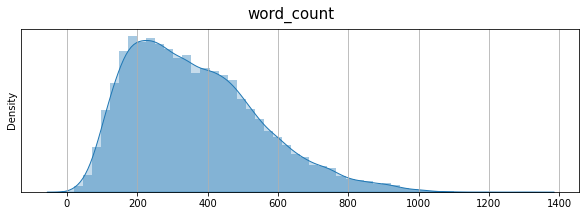

In [13]:
plot_distributions(X, x="word_count", figsize=(10,3))

In [14]:
X_avg_length = int(X["word_count"].mean())
X_avg_length

364

In [15]:
# Summaries
y = add_text_length(dtf, "y_clean")

                      min       mean    max
char_count           36.0  169.45345  326.0
word_count            4.0   27.15025   50.0
sentence_count        1.0    1.00000    1.0
avg_word_length       4.2    6.26177   10.4
avg_sentence_lenght   4.0   27.15025   50.0


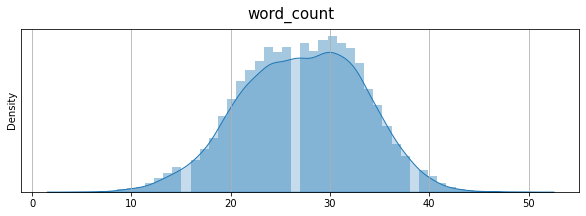

In [16]:
plot_distributions(y, x="word_count", max_cat=1, figsize=(10,3))

In [17]:
y_avg_length = int(y["word_count"].mean())
y_avg_length

27

min     0.010703
mean    0.096562
max     1.210526
Name: ratio, dtype: float64


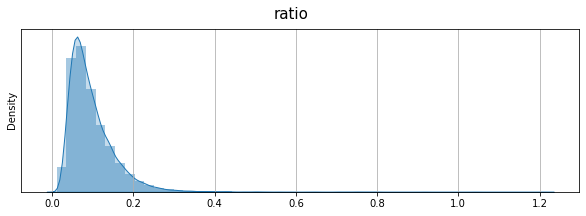

In [18]:
# Ratio summary / text
y["ratio"] = y["word_count"] / X["word_count"]
print(y["ratio"].describe().T[["min","mean","max"]])

plot_distributions(y, x="ratio", figsize=(10,3))

In [19]:
ratio = y["ratio"].mean()
ratio

0.09656221099129843

###### Summary

In [20]:
dtf = dtf[["text","text_clean","y","y_clean"]]
dtf.head()

,text,text_clean,y,y_clean
0,It's official: U.S. President Barack Obama wan...,official president barack obama wants lawmaker...,Syrian official: Obama climbed to the top of t...,syrian official obama climbed top tree know ge...
1,(CNN) -- Usain Bolt rounded off the world cham...,usain bolt rounded world championships sunday ...,Usain Bolt wins third gold of world championsh...,usain bolt wins third gold world championship ...
2,"Kansas City, Missouri (CNN) -- The General Ser...",kansas city missouri general services administ...,The employee in agency's Kansas City office is...,employee agencys kansas city office among hund...
3,Los Angeles (CNN) -- A medical doctor in Vanco...,los angeles medical doctor vancouver british c...,NEW: A Canadian doctor says she was part of a ...,canadian doctor part team examining harry burk...
4,(CNN) -- Police arrested another teen Thursday...,police arrested another teen thursday sixth su...,Another arrest made in gang rape outside Calif...,another arrest made gang rape outside californ...


### 2 - Preprocessing

In [21]:
# Partitioning
dtf_train = dtf.copy().iloc[i+1:]
dtf_test = dtf.copy().iloc[:i+1]
dtf_test

,text,text_clean,y,y_clean
0,It's official: U.S. President Barack Obama wan...,official president barack obama wants lawmaker...,Syrian official: Obama climbed to the top of t...,syrian official obama climbed top tree know ge...
1,(CNN) -- Usain Bolt rounded off the world cham...,usain bolt rounded world championships sunday ...,Usain Bolt wins third gold of world championsh...,usain bolt wins third gold world championship ...
2,"Kansas City, Missouri (CNN) -- The General Ser...",kansas city missouri general services administ...,The employee in agency's Kansas City office is...,employee agencys kansas city office among hund...
3,Los Angeles (CNN) -- A medical doctor in Vanco...,los angeles medical doctor vancouver british c...,NEW: A Canadian doctor says she was part of a ...,canadian doctor part team examining harry burk...
4,(CNN) -- Police arrested another teen Thursday...,police arrested another teen thursday sixth su...,Another arrest made in gang rape outside Calif...,another arrest made gang rape outside californ...
5,(CNN) -- Thousands on Saturday fled the area i...,thousands saturday fled area southwestern ivor...,"Humanitarian groups expect 4,000 refugees in o...",humanitarian groups expect 4000 refugees one c...


### 3 - Baseline (Extractive: TextRank)

In [22]:
# Test (no Train)
predicted = textrank(corpus=dtf_test["text"], ratio=ratio)

In [23]:
# Evaluate
evaluate_summary(dtf_test["y"][i], predicted[i])

rouge1: 0.42 | rouge2: 0.18 | rougeL: 0.18 --> avg rouge: 0.33


In [24]:
# Compare y_test and predicted
match = display_string_matching(dtf_test["y"][i], predicted[i], both=True, sentences=True, 
                                titles=["Real Summary", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

In [25]:
# Explainability
match = display_string_matching(dtf_test["text"][i], predicted[i], both=True, sentences=True, 
                                titles=["Full Text", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

### 4 - Model (Abstractive: Seq2Seq)

###### Features Engineering

In [26]:
# Add START and END tokens
special_tokens = ("<START>", "<END>")
dtf_train["y_clean"] = dtf_train['y_clean'].apply(lambda x: special_tokens[0]+' '+x+' '+special_tokens[1])
dtf_test["y_clean"] = dtf_test['y_clean'].apply(lambda x: special_tokens[0]+' '+x+' '+special_tokens[1])
dtf_test["y_clean"][i]

'<START> humanitarian groups expect 4000 refugees one camp n official others fled across border n camps liberia follows attacks killed 7 n peacekeepers 8 civilians <END>'

--- tokenization ---
48671 words
--- padding to sequence ---
19994 sequences of length 364


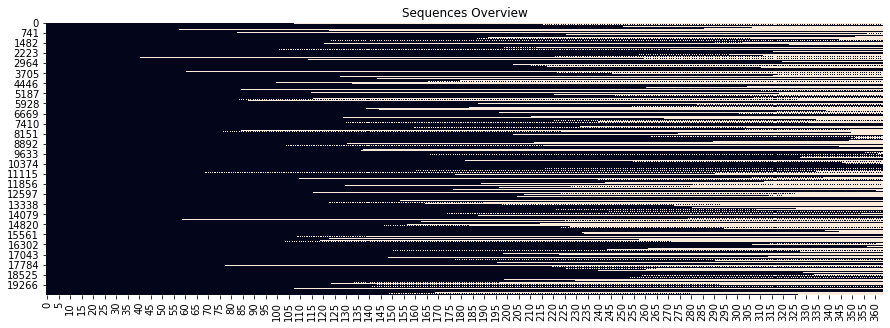

In [27]:
# Create X_train for seq2seq (sequences of tokens)
dic_seq = text2seq(corpus=dtf_train["text_clean"], top=X_top_words, maxlen=X_avg_length)

X_train, tokenizer, X_dic_vocabulary = dic_seq["X"], dic_seq["tokenizer"], dic_seq["dic_vocabulary"]

--- tokenization ---
--- padding to sequence ---
6 sequences of length 364


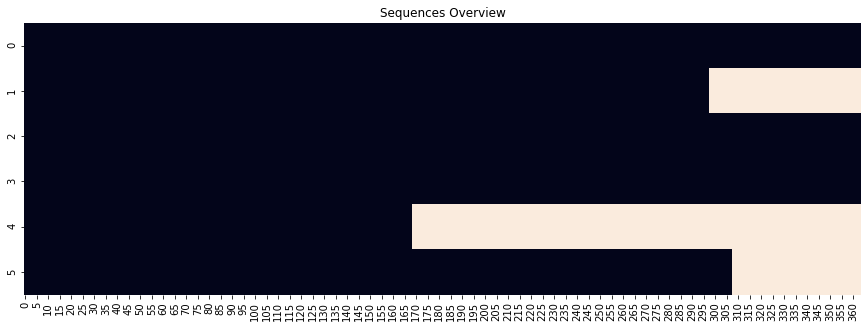

In [28]:
# Preprocess X_test with the same tokenizer
X_test = text2seq(corpus=dtf_test["text_clean"], fitted_tokenizer=tokenizer, maxlen=X_train.shape[1])

--- tokenization ---
11577 words
--- padding to sequence ---
19994 sequences of length 27


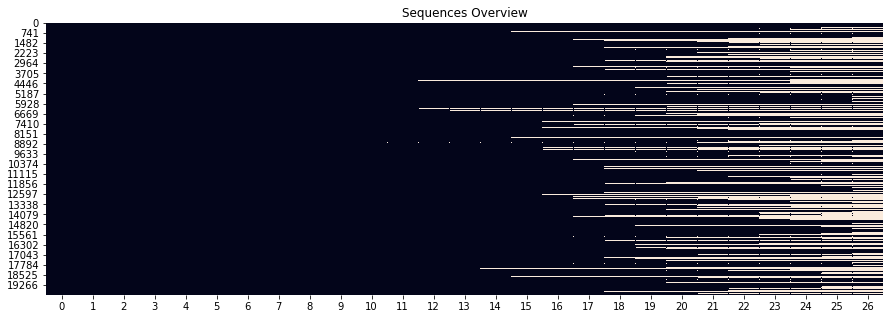

In [29]:
# Tokenize the summaries (y_train)
dic_seq = text2seq(corpus=dtf_train["y_clean"], top=y_top_words, maxlen=y_avg_length)

y_train, tokenizer, y_dic_vocabulary = dic_seq["X"], dic_seq["tokenizer"], dic_seq["dic_vocabulary"]

--- tokenization ---
--- padding to sequence ---
6 sequences of length 27


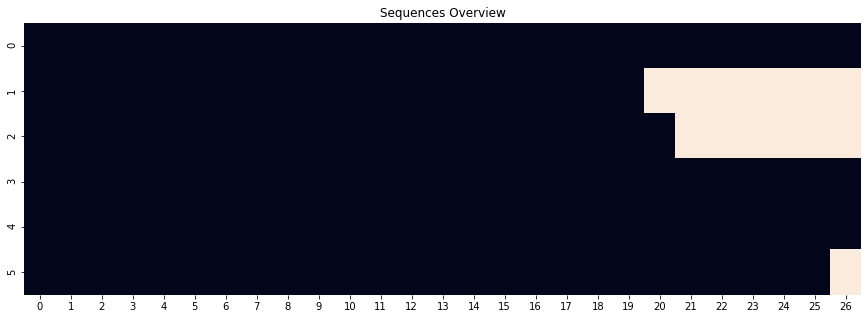

In [30]:
# Preprocess y_test with the same tokenizer
y_test = text2seq(corpus=dtf_test["y_clean"], fitted_tokenizer=tokenizer, maxlen=y_train.shape[1])

###### Create Embedding Weights

In [31]:
# Load pre-trained W2V
nlp = gensim_api.load("glove-wiki-gigaword-300")

In [32]:
X_embeddings = vocabulary_embeddings(X_dic_vocabulary, nlp)
X_embeddings.shape

vocabulary mapped to 48672 vectors of size 300


(48672, 300)

In [33]:
y_embeddings = vocabulary_embeddings(y_dic_vocabulary, nlp)
y_embeddings.shape

vocabulary mapped to 11578 vectors of size 300


(11578, 300)

###### Model Design

In [34]:
# Simple Seq2Seq
lstm_units = 250

##------------ ENCODER (embedding + lstm) ------------------------------##
x_in = layers.Input(name="x_in", shape=(X_train.shape[1],))
### embedding
layer_x_emb = layers.Embedding(name="x_emb", input_dim=X_embeddings.shape[0], output_dim=X_embeddings.shape[1], 
                               weights=[X_embeddings], trainable=False)
x_emb = layer_x_emb(x_in)
### lstm 
layer_x_lstm = layers.LSTM(name="x_lstm", units=lstm_units, dropout=0.4, recurrent_dropout=0.4,
                           return_sequences=True, return_state=True)
x_out, state_h, state_c = layer_x_lstm(x_emb)

##------------ DECODER (embedding + lstm + dense) ---------------------##
y_in = layers.Input(name="y_in", shape=(None,))
### embedding
layer_y_emb = layers.Embedding(name="y_emb", input_dim=y_embeddings.shape[0], output_dim=y_embeddings.shape[1], 
                               weights=[y_embeddings], trainable=False)
y_emb = layer_y_emb(y_in)
### lstm 
layer_y_lstm = layers.LSTM(name="y_lstm", units=lstm_units, dropout=0.4, recurrent_dropout=0.4,
                           return_sequences=True, return_state=True)
y_out, _, _ = layer_y_lstm(y_emb, initial_state=[state_h, state_c])
### final dense layers
layer_dense = layers.TimeDistributed(name="dense", 
                                     layer=layers.Dense(units=y_embeddings.shape[0], activation='softmax'))
y_out = layer_dense(y_out)

## compile
model = models.Model(inputs=[x_in, y_in], outputs=y_out, name="Seq2Seq")
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "Seq2Seq"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_in (InputLayer)               [(None, 364)]        0                                            
__________________________________________________________________________________________________
y_in (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
x_emb (Embedding)               (None, 364, 300)     14601600    x_in[0][0]                       
__________________________________________________________________________________________________
y_emb (Embedding)               (None, None, 300)    3473400     y_in[0][0]                       
____________________________________________________________________________________________

In [44]:
# Seq2Seq with Embedding + Bi-LSTM + Attention layers
lstm_units = 250

##------------ ENCODER (embedding + 3 lstm) ------------------------------##
x_in = layers.Input(name="x_in", shape=(X_train.shape[1],))
### embedding
layer_x_emb = layers.Embedding(name="x_emb", input_dim=X_embeddings.shape[0], output_dim=X_embeddings.shape[1], 
                               weights=[X_embeddings], trainable=False)
x_emb = layer_x_emb(x_in)
### lstm 1
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.4, recurrent_dropout=0.4,
                                                  return_sequences=True, return_state=True), 
                                      name="x_lstm_1")
x_out, _, _, _, _ = layer_x_bilstm(x_emb)
### lstm 2
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.4, recurrent_dropout=0.4,
                                                  return_sequences=True, return_state=True),
                                      name="x_lstm_2")
x_out, _, _, _, _ = layer_x_bilstm(x_out)
### lstm 3 (here final states are collected)
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.4, recurrent_dropout=0.4,
                                                  return_sequences=True, return_state=True),
                                      name="x_lstm_3")
x_out, forward_h, forward_c, backward_h, backward_c = layer_x_bilstm(x_out)
state_h = layers.Concatenate()([forward_h, backward_h])
state_c = layers.Concatenate()([forward_c, backward_c])

##------------ DECODER (embedding + lstm + attention + dense) ------------##
y_in = layers.Input(name="y_in", shape=(None,))
### embedding
layer_y_emb = layers.Embedding(name="y_emb", input_dim=y_embeddings.shape[0], output_dim=y_embeddings.shape[1], 
                               weights=[y_embeddings], trainable=False)
y_emb = layer_y_emb(y_in)
### lstm
layer_y_lstm = layers.LSTM(name="y_lstm", units=lstm_units*2, dropout=0.2, recurrent_dropout=0.2,
                           return_sequences=True, return_state=True)
y_out, _, _ = layer_y_lstm(y_emb, initial_state=[state_h, state_c])
### attention
#x, state_x = layers.Attention()([x_out, y_out])
#merge = layers.Concatenate(name='merge', axis=-1)([y_out, y_emb])
### final dense layers
layer_dense = layers.TimeDistributed(name="dense", 
                                     layer=layers.Dense(units=y_embeddings.shape[0], activation='softmax'))
y_out = layer_dense(y_out)

## compile
model = models.Model(inputs=[x_in, y_in], outputs=y_out, name="Seq2Seq")
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "Seq2Seq"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_in (InputLayer)               [(None, 364)]        0                                            
__________________________________________________________________________________________________
x_emb (Embedding)               (None, 364, 300)     14601600    x_in[0][0]                       
__________________________________________________________________________________________________
x_lstm_1 (Bidirectional)        [(None, 364, 500), ( 1102000     x_emb[0][0]                      
__________________________________________________________________________________________________
x_lstm_2 (Bidirectional)        [(None, 364, 500), ( 1502000     x_lstm_1[0][0]                   
____________________________________________________________________________________________

###### Train

In [45]:
# This takes a while
model = fit_seq2seq(X_train, y_train, X_embeddings, y_embeddings, model, 
                    build_encoder_decoder=False, epochs=10, batch_size=64)
#model, encoder_model, decoder_model = fit_seq2seq(X_train, y_train, X_embeddings, y_embeddings, model, 
#                                                  build_encoder_decoder=True, epochs=10, batch_size=64)

KeyboardInterrupt: 

###### Test

In [ ]:
# Prediction Encoder
encoder_model = models.Model(inputs=x_in, outputs=[x_out, state_h, state_c], name="Prediction_Encoder")
encoder_model.summary()

In [ ]:
# Prediction Decoder
lstm_units = lstm_units*2

## states of the previous time step
encoder_out = layers.Input(shape=(X_train.shape[1], lstm_units))
state_h, state_c = layers.Input(shape=(lstm_units,)), layers.Input(shape=(lstm_units,))

## decoder embeddings
y_emb2 = layer_y_emb(y_in)

## lstm to predict the next word
y_out2, state_h2, state_c2 = layer_y_lstm(y_emb2, initial_state=[state_h, state_c])

## softmax to generate probability distribution over the target vocabulary
probs = layer_dense(y_out2)

## compile
decoder_model = models.Model(inputs=[y_in, encoder_out, state_h, state_c], 
                             outputs=[probs, state_h2, state_c2],
                             name="Prediction_Decoder")
decoder_model.summary()

In [ ]:
predicted = predict_seq2seq(X_test, encoder_model, decoder_model, tokenizer, special_tokens)

In [ ]:
# Evaluate
evaluate_summary(dtf_test["y_clean"][i], predicted[i])

In [ ]:
# Compare y_test and predicted
match = display_string_matching(dtf_test["y_clean"][i], predicted[i], both=True, sentences=True, 
                                titles=["Real Summary", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

In [ ]:
# Explainability
match = display_string_matching(dtf_test["text_clean"][i], predicted[i], both=True, sentences=True, 
                                titles=["Full Text", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

### 5 - Model (Abstractive: Language model)

In [96]:
# Test (no Train)
predicted = bart(corpus=[dtf_test["text"]], ratio=ratio)
predicted = predicted[0]

In [97]:
# Evaluate
evaluate_summary(y_test, predicted)

rouge1: 0.39 | rouge2: 0.15 | rougeL: 0.15 --> avg rouge: 0.31


In [98]:
# Compare y_test and predicted
match = display_string_matching(y_test, predicted, both=True, sentences=True, 
                                titles=["Real Summary", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

In [99]:
# Explainability
match = display_string_matching(dtf_test["text_clean"], predicted, both=True, sentences=True, 
                                titles=["Full Text", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))